For our fiducial HOD parameter, we select $\sigma_{\log M} = 0.2 {\rm dex}$, which is an unrealistically low scatter. To test whether our results are dramatically impacted by this choice, we want to examine $\frac{\partial B}{\partial \sigma_{\log M}}$ at a more realistic $\sigma_{\log M}$ value using the ${\sc Quijote}$ high resolution simulations.

In this notebook I determine the fiducial $\sigma_{\log M}$ for the high resolution simulation

In [1]:
import os 
import scipy as sp 
import numpy as np 
# --- eMaNu --- 
from emanu import util as UT
from emanu import forwardmodel as FM
from emanu.sims import data as simData

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline 

In [3]:
# QUIJOTE cosmology lookup table
hdr = np.genfromtxt(os.path.join(UT.dat_dir(), 'quijote_header_lookup.dat'), 
        delimiter='\t', dtype=None, names=('theta', 'snapnum', 'Om', 'Ol', 'z', 'h', 'Hz'))
_cosmos = list(hdr['theta'].astype(str)) 
i_hdr = _cosmos.index('fiducial')  

/Users/ChangHoon/opt/anaconda3/envs/emanu/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
halos_hires = simData.hqHalos('/Users/ChangHoon/data/emanu/halos/quijote/fiducial_HR/0', None, 4,
                              Om=hdr['Om'][i_hdr], Ol=hdr['Ol'][i_hdr], z=hdr['z'][i_hdr], h=hdr['h'][i_hdr], Hz=hdr['Hz'][i_hdr])
Mh_min_hires = np.log10(np.array(halos_hires['Mass']).min())
print('log(Mh_min) = %f' % (Mh_min_hires))


log(Mh_min) = 12.215215


In [5]:
# Zheng et al. halo occupation functions 
def Ncen_Mh(tt, logMh): 
    ''' expected Ncen at Mh 
    '''
    logMmin, sig_logM, _, _, _ = tt
    Ncen = 0.5 * (1. + sp.special.erf((logMh - logMmin)/sig_logM)) 
    Ncen[~np.isfinite(Ncen)] = 0. 
    return Ncen

def Nsat_Mh(tt, logMh): 
    ''' expected Nsat at Mh
    '''
    _Ncen = Ncen_Mh(tt, logMh) 
    _, _, logM0, alpha, logM1 = tt
    Nsat = _Ncen * ((10**logMh - 10**logM0)/10**logM1)**alpha
    Nsat[~np.isfinite(Nsat)] = 0. 
    return Nsat 

def Ngal_Mh(tt, logMh): 
    return Ncen_Mh(tt, logMh) + Nsat_Mh(tt, logMh)

In [6]:
z07_21_5 = np.array([13.38, 0.51, 13.94, 1.04, 13.91]) # Zheng+(2007) Mr<-21.5
g15_21_5 = np.array([13.53, 0.72, 13.13, 1.14, 14.52]) # Guo+(2015) Mr<-21.5
v19_21_5 = np.array([13.39, 0.56, 12.87, 1.26, 14.51]) # Vakili+(2019) Mr<-21.5
z07_22_0 = np.array([14.22, 0.77, 14.00, 0.87, 14.69]) # Zheng+(2007) Mr<-22

/Users/ChangHoon/opt/anaconda3/envs/emanu/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
/Users/ChangHoon/opt/anaconda3/envs/emanu/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
/Users/ChangHoon/opt/anaconda3/envs/emanu/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
/Users/ChangHoon/opt/anaconda3/envs/emanu/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
/Users/ChangHoon/opt/anaconda3/envs/emanu/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
/Users/ChangHoon/opt/anaconda3/envs/emanu/lib/python3.7/site

(0.01, 50.0)

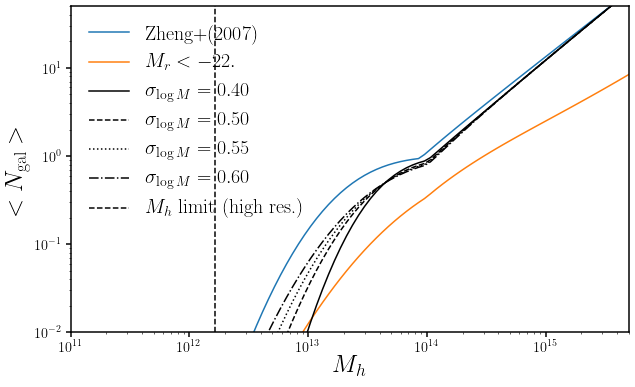

In [7]:
logMbin = np.linspace(11., 16., 100) # logMh bins

fig = plt.figure(figsize=(10,6))
sub = fig.add_subplot(111)
sub.plot(10**logMbin, Ngal_Mh(z07_21_5, logMbin), label='Zheng+(2007)')
sub.plot(10**logMbin, Ngal_Mh(z07_22_0, logMbin), label='$M_r < -22.$')

for sig, ls in zip([0.4, 0.5, 0.55, 0.6], ['-', '--', ':', '-.']): 
    _hod_fid = np.array([13.65, sig, 14., 1.1, 14.])
    sub.plot(10**logMbin, Ngal_Mh(_hod_fid, logMbin), c='k', ls=ls, label=r'$\sigma_{\log M} = %.2f$' % sig)

sub.plot([10**Mh_min_hires, 10**Mh_min_hires], [1e-3, 1e3], c='k', ls='--', label='$M_h$ limit (high res.)')

sub.legend(loc='upper left', fontsize=20)
sub.set_xlabel('$M_h$', fontsize=25)
sub.set_xscale('log')
sub.set_xlim(1e11, 5e15)
sub.set_ylabel(r'$<N_{\rm gal}>$', fontsize=25)
sub.set_yscale('log')
sub.set_ylim(1e-2, 5e1)

Based on the comparison to Zheng+(2007), lets use $\sigma_{\log M} = 0.55{\rm dex}$. 